# このページについて

Bandit本13章のミニマックスリグレットとミニマックス最適性について解説します．
## 最悪ケースのリグレットと，ミニマックスリグレット

### 方策の最悪ケースリグレット
方策$\pi$を確率的バンディット環境の集合$\mathcal{E}$に適用した際の最悪ケースリグレットは，次のように定義されます．
 $$
  R_n(\pi, \mathcal{E})=\sup _{\nu \in \mathcal{E}} R_n(\pi, \nu) .
 $$
### ミニマックスリグレット
$\Pi$をすべての方策の集合とします．環境の集合$\mathcal{E}$に対するミニマックスリグレットは，次のように定義されます．
$$
R_n^*(\mathcal{E})=\inf _{\pi \in \Pi} R_n(\pi, \mathcal{E})=\inf _{\pi \in \Pi} \sup _{\nu \in \mathcal{E}} R_n(\pi, \nu) .
$$
 これは，あらゆる方策の中で最悪ケースリグレットを最小化する方策を採用した場合のリグレットです．どんな環境に対しても，ある一定以上の性能を保証できる方策を探すことを意味します．

### ミニマックス最適性
ある方策$\pi$が環境の集合$\mathcal{E}$に対して$R_n(\pi, \mathcal{E})=R_n^*(\mathcal{E})$を満たす場合，その方策は$\mathcal{E}$に対してミニマックス最適であると言います．$R_n^*(\mathcal{E})$が小さいほど，最悪の場合でも比較的小さなリグレットで済むことを意味します．ミニマックス最適な方策を見つけることは，一般的に計算量的に非常に困難です．そのため，実際には，ミニマックス最適に近い性能を持つ方策を求めます．

本ページでは次の定理を証明することを目的とします．これは第9章のアルゴリズム7(**MOSS**)が，$[0,1]$の範囲のnear-optimalギャップを持つ1-subgaussianバンディットに対して，定数因子までミニマックス最適であることを示しています．
### 定理 13.1

$\mathcal{E}^k$を，単位分散と平均$\mu \in[0,1]^k$を持つ$k$-腕ガウスバンディットの集合する．このとき，すべての$k>1$および$n \geq k$に対して，$R_n^*\left(\mathcal{E}^k\right) \geq c \sqrt{k n}$が成り立つような普遍的な定数$c>0$が存在する．

この定理は，どんなに良い方策を用いても，$\sqrt{kn}$に比例するリグレットが発生することを意味します．つまり，この問題設定において，$\sqrt{kn}$よりも小さなオーダーのリグレットを常に達成できる方策は存在しないわけです． 


「平均0のガウス分布」と「平均$\Delta$のガウス分布」を、$N$個のサンプルから区別しようとする簡単な仮説検定のシミュレーションを行います。

シミュレーションを開始します...
 Delta = 0.2
  N = 5: 誤り確率 (mu=0) = 0.3880
  N = 5: 誤り確率 (mu=delta) = 0.3920
  N = 10: 誤り確率 (mu=0) = 0.3680
  N = 10: 誤り確率 (mu=delta) = 0.3600
  N = 20: 誤り確率 (mu=0) = 0.3170
  N = 20: 誤り確率 (mu=delta) = 0.3310
  N = 50: 誤り確率 (mu=0) = 0.2250
  N = 50: 誤り確率 (mu=delta) = 0.2590
  N = 100: 誤り確率 (mu=0) = 0.1480
  N = 100: 誤り確率 (mu=delta) = 0.1690
 Delta = 0.5
  N = 5: 誤り確率 (mu=0) = 0.2780
  N = 5: 誤り確率 (mu=delta) = 0.2840
  N = 10: 誤り確率 (mu=0) = 0.2130
  N = 10: 誤り確率 (mu=delta) = 0.2030
  N = 20: 誤り確率 (mu=0) = 0.1150
  N = 20: 誤り確率 (mu=delta) = 0.1300
  N = 50: 誤り確率 (mu=0) = 0.0390
  N = 50: 誤り確率 (mu=delta) = 0.0470
  N = 100: 誤り確率 (mu=0) = 0.0100
  N = 100: 誤り確率 (mu=delta) = 0.0040
 Delta = 1.0
  N = 5: 誤り確率 (mu=0) = 0.1350
  N = 5: 誤り確率 (mu=delta) = 0.1400
  N = 10: 誤り確率 (mu=0) = 0.0550
  N = 10: 誤り確率 (mu=delta) = 0.0480
  N = 20: 誤り確率 (mu=0) = 0.0050
  N = 20: 誤り確率 (mu=delta) = 0.0140
  N = 50: 誤り確率 (mu=0) = 0.0000
  N = 50: 誤り確率 (mu=delta) = 0.0000
  N = 100: 誤り確率 (mu=0

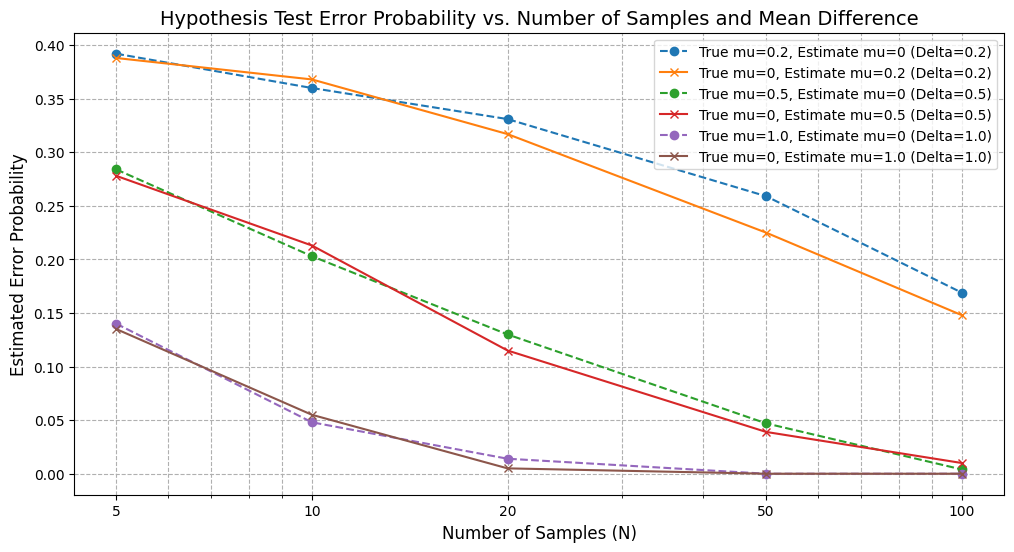

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_hypothesis_test(mu_true, delta, num_samples, num_simulations):
    """
    平均 0 または delta のガウス分布からのサンプルに基づく仮説検定をシミュレーションする

    Args:
        mu_true (float): 真の平均 (0 または delta)
        delta (float): もう一方の平均との差 (> 0)
        num_samples (int): 各シミュレーションで取得するサンプルの数 N
        num_simulations (int): 実行するシミュレーションの総数

    Returns:
        float: 誤って判断した割合 (誤り確率の推定値)
    """
    errors = 0
    for _ in range(num_simulations):
        # 真の平均を持つガウス分布からサンプルを生成
        samples = np.random.normal(loc=mu_true, scale=1.0, size=num_samples)

        # 標本平均を計算
        sample_mean = np.mean(samples)

        # 標本平均に基づき、真の平均を推定 (閾値 delta / 2 で判定)
        # 標本平均が delta/2 より大きければ平均 delta と推定、そうでなければ平均 0 と推定
        estimated_mu = delta if sample_mean >= delta / 2 else 0

        # 推定が真の平均と異なればエラー
        if estimated_mu != mu_true:
            errors += 1

    return errors / num_simulations

# --- シミュレーション設定 ---
delta_values = [0.2, 0.5, 1.0] # 平均差 Delta の候補
sample_counts = [5, 10, 20, 50, 100] # サンプル数 N の候補
num_simulations_per_setting = 1000 # 各設定で実行するシミュレーション回数

# --- シミュレーション実行と結果の収集 ---
results_mu_0 = {} # 真の平均が 0 の場合の誤り確率
results_mu_delta = {} # 真の平均が delta の場合の誤り確率

print("シミュレーションを開始します...")

for delta in delta_values:
    results_mu_0[delta] = []
    results_mu_delta[delta] = []
    print(f" Delta = {delta}")
    for N in sample_counts:
        # 真の平均が 0 の場合
        error_rate_0 = simulate_hypothesis_test(0, delta, N, num_simulations_per_setting)
        results_mu_0[delta].append(error_rate_0)
        print(f"  N = {N}: 誤り確率 (mu=0) = {error_rate_0:.4f}")

        # 真の平均が delta の場合
        error_rate_delta = simulate_hypothesis_test(delta, delta, N, num_simulations_per_setting)
        results_mu_delta[delta].append(error_rate_delta)
        print(f"  N = {N}: 誤り確率 (mu=delta) = {error_rate_delta:.4f}")

print("シミュレーションが完了しました。")

# --- 結果の可視化 ---
plt.figure(figsize=(12, 6))

for delta in delta_values:
    # 真の平均が 0 の場合の誤り確率 (第二種過誤に相当)
    plt.plot(sample_counts, results_mu_delta[delta], marker='o', linestyle='--', label=f'True mu={delta}, Estimate mu=0 (Delta={delta})')
    # 真の平均が delta の場合の誤り確率 (第一種過誤に相当)
    plt.plot(sample_counts, results_mu_0[delta], marker='x', linestyle='-', label=f'True mu=0, Estimate mu={delta} (Delta={delta})')


plt.xscale('log') # サンプル数を対数スケールに
plt.xlabel('Number of Samples (N)', fontsize=12)
plt.ylabel('Estimated Error Probability', fontsize=12)
plt.title('Hypothesis Test Error Probability vs. Number of Samples and Mean Difference', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle='--')
plt.xticks(sample_counts, sample_counts) # x軸の目盛りをサンプル数に合わせる
plt.show()